## Reto 5: Distribución de ratings de las películas más valoradas

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Creación de filtros usando `apply`
    
---
    
### 2. Desarrollo:

#### a) Creando un box plot de distribución de ratings

Vamos a ver cómo están distribuidos los ratings de las películas más valoradas de nuestro dataset. La siguiente es una lista de las películas que tienen más de 2500 valoraciones en nuestro dataset:

`[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]`

Realiza los siguientes pasos:

1. Lee tus archivos `ratings` y `movies`.
2. Obtén una lista con los ids de las películas con más de 2500 valoraciones.Debe ser igual a la lista de arriba.
3. Crea una función que tome una lista de ids y un id y regrese `True` si el id se encuentra en la lista (puedes usar el operador `in` de Python).
4. Usa `apply` para aplicar esa función a la columna `ratings['movie_id']` y obtener un filtro.
5. Usa tu filtro para filtrar el `DataFrame` `ratings` y quedarte solamente con las entradas de las películas que fueron valoradas más de 2500 veces.
6. Usando `merge` agrega los nombres de las películas a tu `DataFrame` `ratings`. Asigna el resultado a la variable `ratings_filtrados_con_nombre`.

> **Nota** el paso #4 es algo complejo. Si tienes dificultades para realizarlo, ¡no dudes en pedirle ayuda a tu experta!

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('../Ejemplo-02/movies.csv', sep="#", index_col=0)
ratings = pd.read_csv('../Ejemplo-02/ratings.csv', index_col= 0 )

In [3]:
def esta_en_lista(valor, lista):
    """ Función que valida si el valor indicado se encuentra en la lista """
    if valor in lista:
        return True
    else:
        return False

In [4]:
ratings_movies = ratings.groupby("movie_id")["rating"].sum().reset_index(name='rating').set_index("movie_id", drop=True)
rating_movies_list = list(ratings_movies[ ratings_movies["rating"] > 2500 ].index.values)
ratings_filtered = ratings[ratings["movie_id"].apply( esta_en_lista, args=(rating_movies_list,) )]

,movie_id,rating,timestamp
user_id,,,
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
...,...,...,...
6040,1091,1,956716541
6040,1094,5,956704887
6040,562,5,956704746


In [14]:
ratings_filtered.shape

(2408505, 3)

In [7]:
pd.merge(ratings_filtered, movies, left_on="movie_id", right_index=True)
#ratings_filtrados_con_nombre = pd.merge(ratings_filtered, movies, left_on="movie_id", right_index=True)

,movie_id,rating,timestamp,title,genres
user_id,,,,,
1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...
5816,2889,5,957914832,"Mystery, Alaska (1999)",Comedy
5831,2889,4,960873449,"Mystery, Alaska (1999)",Comedy
5836,2889,3,957845106,"Mystery, Alaska (1999)",Comedy


A continuación la celda de validación, pero tu `DataFrame` resultante debe de tener una columna `title` y otra `rating` para que la visualización pueda funcionar:

c:\users\hborda\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


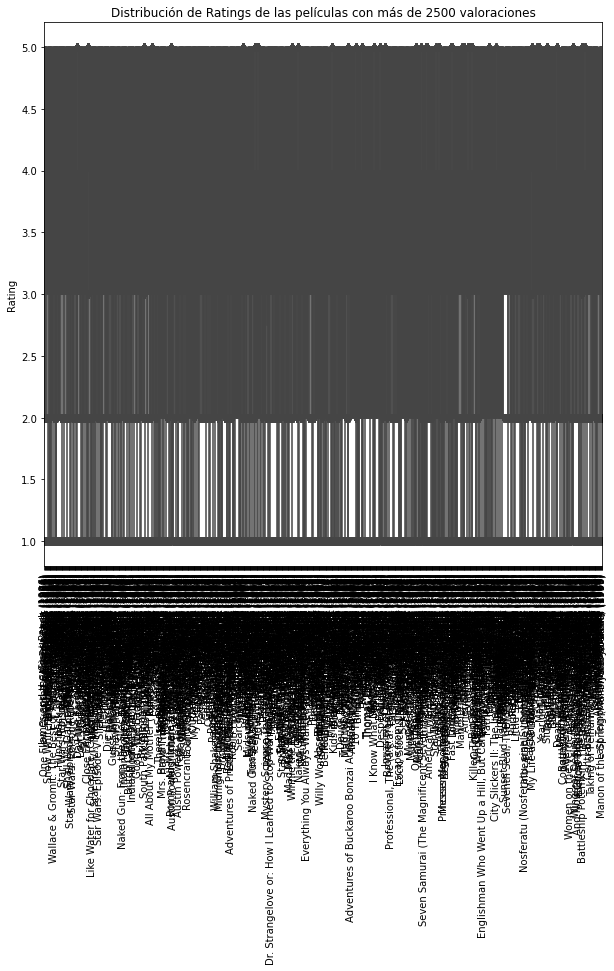

In [6]:
def visualizar_boxplots(ratings_filtrados_con_nombre):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Distribución de Ratings de las películas con más de 2500 valoraciones')
    plot = sns.boxplot(ratings_filtrados_con_nombre['title'], ratings_filtrados_con_nombre['rating'], ax=ax)
    ax.set(xlabel=None, ylabel='Rating')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    
visualizar_boxplots(ratings_filtrados_con_nombre)